In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\Reet\Downloads\dataset\Time_series\IHLIDXUS.csv')
df.head(5)

,DATE,IHLIDXUS
0,2020-02-01,100.00
1,2020-02-02,99.98
2,2020-02-03,99.97
3,2020-02-04,100.03
4,2020-02-05,100.12


In [46]:
df.skew().sort_values(ascending=False)

IHLIDXUS   -0.631777
dtype: float64

In [42]:
df3['IHLIDXUS'] = np.log(df3['IHLIDXUS'])

In [43]:
df3.skew().sort_values(ascending=False)

IHLIDXUS   -0.958685
dtype: float64

In [49]:
df3 = df.groupby('DATE')['IHLIDXUS'].sum().reset_index()
df3['DATE'] = pd.to_datetime(df3['DATE'])
df3= df3.set_index('DATE')
df3['IHLIDXUS'] = np.log(df3['IHLIDXUS'])
df3.index

DatetimeIndex(['2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
               '2020-02-09', '2020-02-10',
               ...
               '2023-07-26', '2023-07-27', '2023-07-28', '2023-07-29',
               '2023-07-30', '2023-07-31', '2023-08-01', '2023-08-02',
               '2023-08-03', '2023-08-04'],
              dtype='datetime64[ns]', name='DATE', length=1281, freq=None)

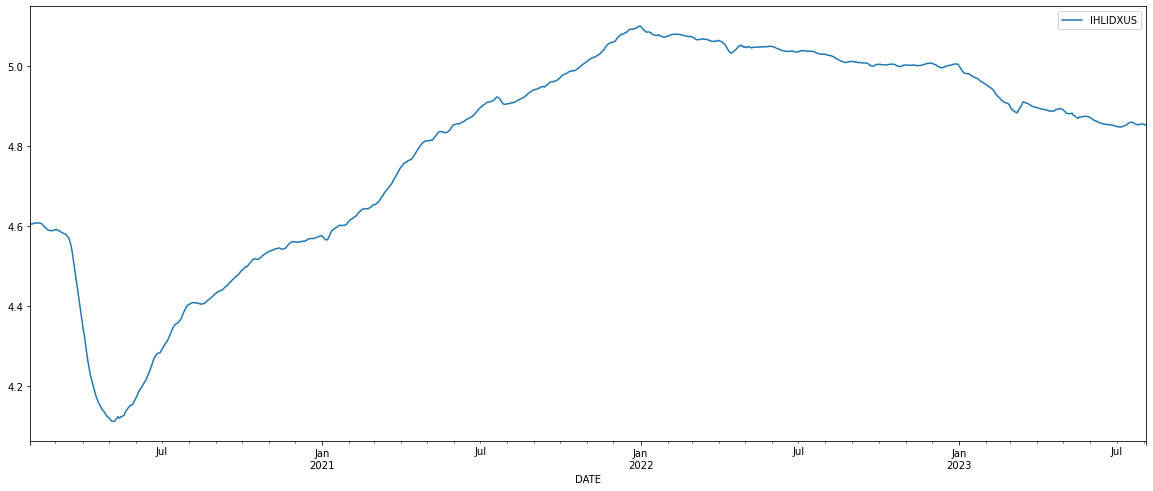

In [50]:
#### Original Plot
df3.plot(figsize=(20, 8))
plt.show()


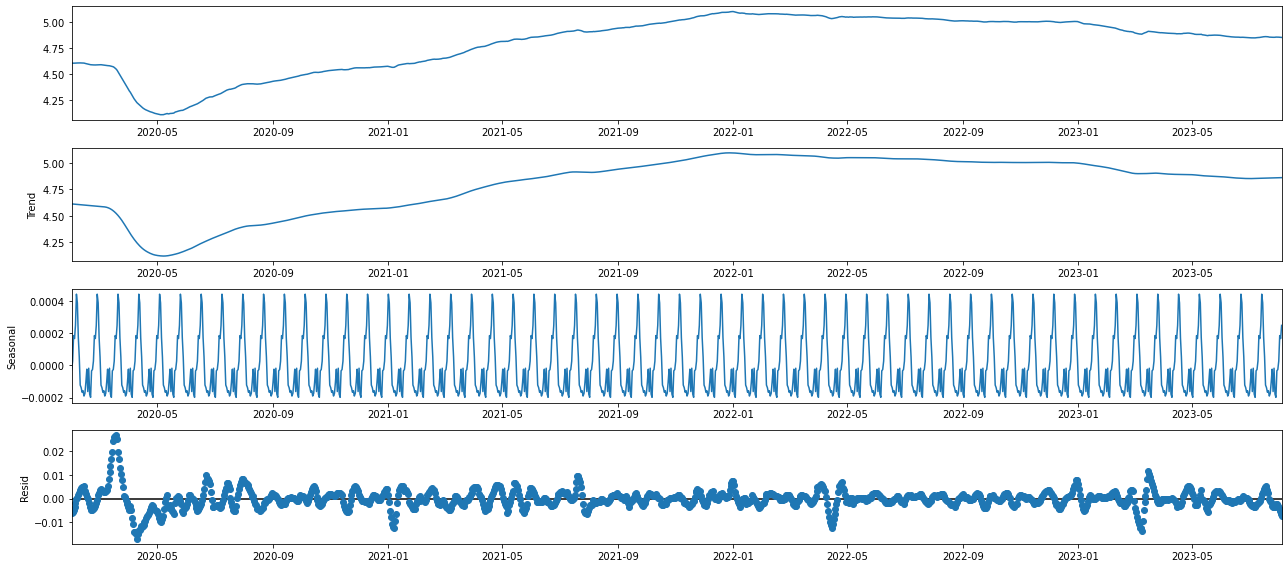

In [51]:
from statsmodels.tsa import seasonal

decomposed1 = seasonal.seasonal_decompose(x=df3, freq=22, extrapolate_trend='freq',model = 'additive')
fig = decomposed1.plot()
plt.show()

[(0, 0, 0, 16), (0, 0, 1, 16), (0, 1, 0, 16), (0, 1, 1, 16), (1, 0, 0, 16), (1, 0, 1, 16), (1, 1, 0, 16), (1, 1, 1, 16)]
ARIMA(1, 1, 1)x(1, 1, 1, 16)12 - AIC:-11447.054250505153
                               SARIMAX Results                                
Dep. Variable:               IHLIDXUS   No. Observations:                 1281
Model:               SARIMAX(1, 0, 0)   Log Likelihood                5725.527
Date:                Fri, 11 Aug 2023   AIC                         -11447.054
Time:                        01:58:20   BIC                         -11436.743
Sample:                    02-01-2020   HQIC                        -11443.183
                         - 08-04-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   6.65e-06

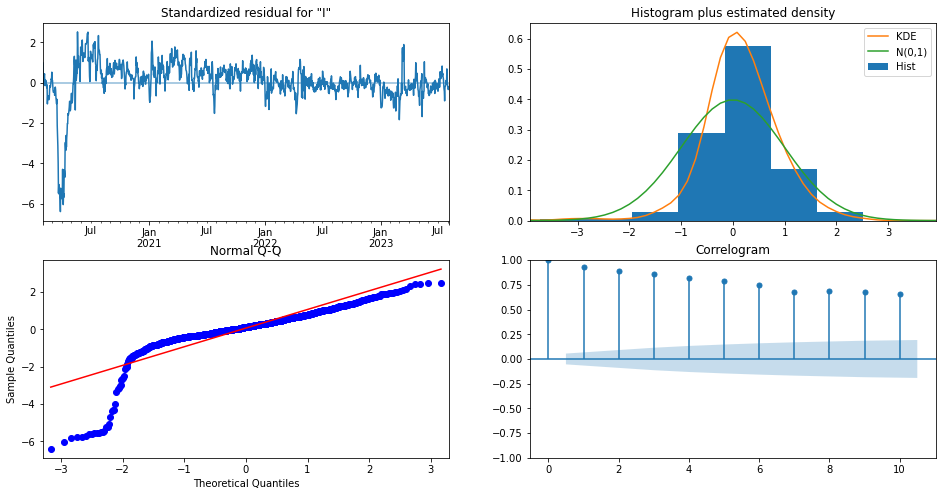

In [52]:
#### Time Series prediction with ARIMA 
#### Decomposition #### 

import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

p = d = q = range(0, 2)
pd = list(itertools.product(p, d, q))
seasonal_pd = [(x[0], x[1], x[2],16) for x in list(itertools.product(p, d,q))]

print(seasonal_pd)

for param in pd:
    for param_seasonal in seasonal_pd:        
        mod = sm.tsa.statespace.SARIMAX(df3['IHLIDXUS'])
results = mod.fit()
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

### Fitting with the latest Value

mod = sm.tsa.statespace.SARIMAX(df3['IHLIDXUS'])
results = mod.fit()

print(results.summary())


#### plot_result_diagnostic statistics ##

results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [53]:
#### Getting the BEst paramters #### 

for param in pd:
    for param_seasonal in seasonal_pd:
            mod = sm.tsa.statespace.SARIMAX(df3['IHLIDXUS'],order=param,seasonal_order=(0,0,0,0))
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 16)12 - AIC:7659.144199974545
ARIMA(0, 0, 0)x(0, 0, 1, 16)12 - AIC:7659.144199974545
ARIMA(0, 0, 0)x(0, 1, 0, 16)12 - AIC:7659.144199974545
ARIMA(0, 0, 0)x(0, 1, 1, 16)12 - AIC:7659.144199974545
ARIMA(0, 0, 0)x(1, 0, 0, 16)12 - AIC:7659.144199974545
ARIMA(0, 0, 0)x(1, 0, 1, 16)12 - AIC:7659.144199974545
ARIMA(0, 0, 0)x(1, 1, 0, 16)12 - AIC:7659.144199974545
ARIMA(0, 0, 0)x(1, 1, 1, 16)12 - AIC:7659.144199974545
ARIMA(0, 0, 1)x(0, 0, 0, 16)12 - AIC:5893.461762431074
ARIMA(0, 0, 1)x(0, 0, 1, 16)12 - AIC:5893.461762431074
ARIMA(0, 0, 1)x(0, 1, 0, 16)12 - AIC:5893.461762431074
ARIMA(0, 0, 1)x(0, 1, 1, 16)12 - AIC:5893.461762431074
ARIMA(0, 0, 1)x(1, 0, 0, 16)12 - AIC:5893.461762431074
ARIMA(0, 0, 1)x(1, 0, 1, 16)12 - AIC:5893.461762431074
ARIMA(0, 0, 1)x(1, 1, 0, 16)12 - AIC:5893.461762431074
ARIMA(0, 0, 1)x(1, 1, 1, 16)12 - AIC:5893.461762431074
ARIMA(0, 1, 0)x(0, 0, 0, 16)12 - AIC:-11455.007997928195
ARIMA(0, 1, 0)x(0, 0, 1, 16)12 - AIC:-11455.007997928195
ARIMA(

                               SARIMAX Results                                
Dep. Variable:               IHLIDXUS   No. Observations:                 1281
Model:               SARIMAX(1, 1, 1)   Log Likelihood                7026.184
Date:                Fri, 11 Aug 2023   AIC                         -14046.367
Time:                        01:59:31   BIC                         -14030.904
Sample:                    02-01-2020   HQIC                        -14040.561
                         - 08-04-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9641      0.005    189.175      0.000       0.954       0.974
ma.L1         -0.2771      0.021    -13.432      0.000      -0.318      -0.237
sigma2      9.969e-07   2.11e-08     47.329      0.0

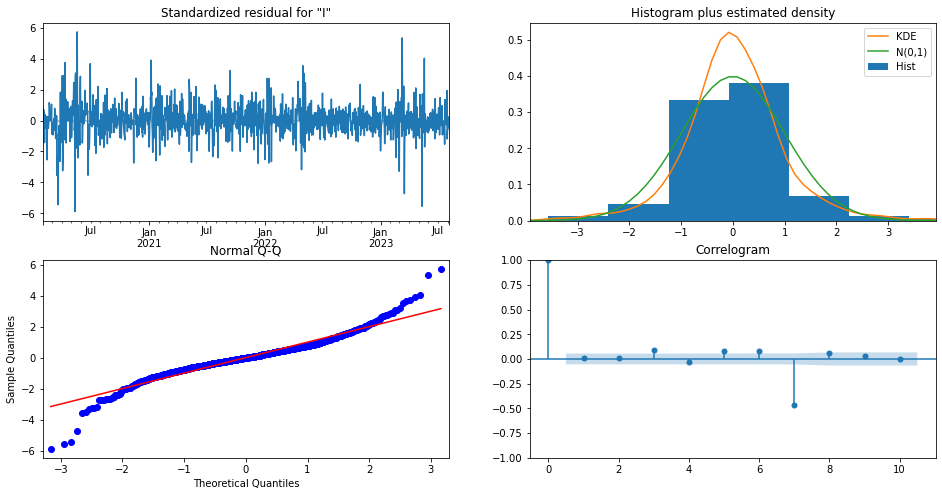

In [54]:
## Taking the best AIC Value
mod = sm.tsa.statespace.SARIMAX(df3['IHLIDXUS'],order=(1, 1, 1),seasonal_order=(0,0,0,16))
results = mod.fit()

print(results.summary())

results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [91]:
df3.index[1201]

Timestamp('2023-05-17 00:00:00')

In [92]:
pred2 = results.get_prediction(start=df3.index[1201], dynamic=False)
pred_ci2 = pred2.conf_int()

In [93]:
len(pred_ci2)

80

In [94]:
pred_ci2

,lower IHLIDXUS,upper IHLIDXUS
2023-05-17,4.867798,4.871712
2023-05-18,4.866936,4.870849
2023-05-19,4.866011,4.869925
2023-05-20,4.871651,4.875565
2023-05-21,4.870349,4.874263
...,...,...
2023-07-31,4.853753,4.857667
2023-08-01,4.853067,4.856981
2023-08-02,4.852051,4.855965
2023-08-03,4.850792,4.854705


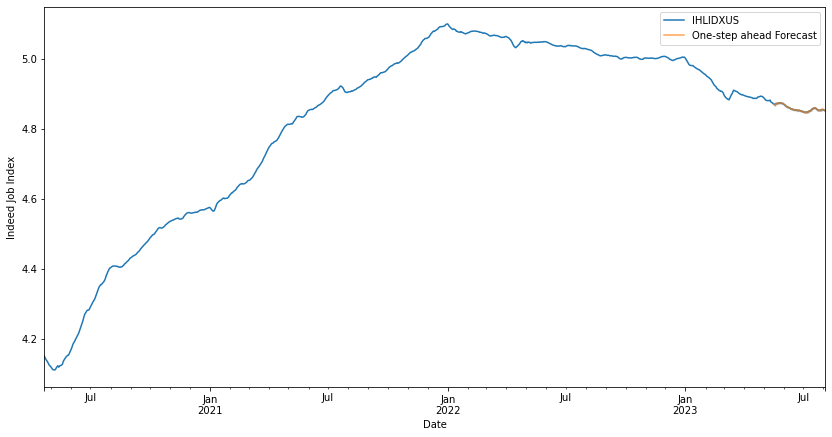

In [95]:
ax = df3['2020-04-21':].plot(label='observed')
pred2.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci2.index,pred_ci2.iloc[:, 0],pred_ci2.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Indeed Job Index')
plt.legend()
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
arma_rmse = np.sqrt(mean_squared_error(pred_ci2.iloc[:, 0],pred_ci2.iloc[:, 1]))
mae = mean_absolute_error(pred_ci2.iloc[:, 0],pred_ci2.iloc[:, 1])
print('MAE: %f' % mae)
print("RMSE: ",arma_rmse)


MAE: 3.063969
RMSE:  109.52254375175612


In [96]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
arma_rmse = np.sqrt(mean_squared_error(pred_ci2.iloc[:, 0],pred_ci2.iloc[:, 1]))
mae = mean_absolute_error(pred_ci2.iloc[:, 0],pred_ci2.iloc[:, 1])
print('MAE: %f' % mae)
print("RMSE: ",arma_rmse)

MAE: 0.003914
RMSE:  0.0039138189497389675


In [100]:
### predicted future values and dates


pred2 = results.get_prediction(start='2023-05-17', end='2024-02-14', dynamic=False)
pred_ci2 = pred2.conf_int()

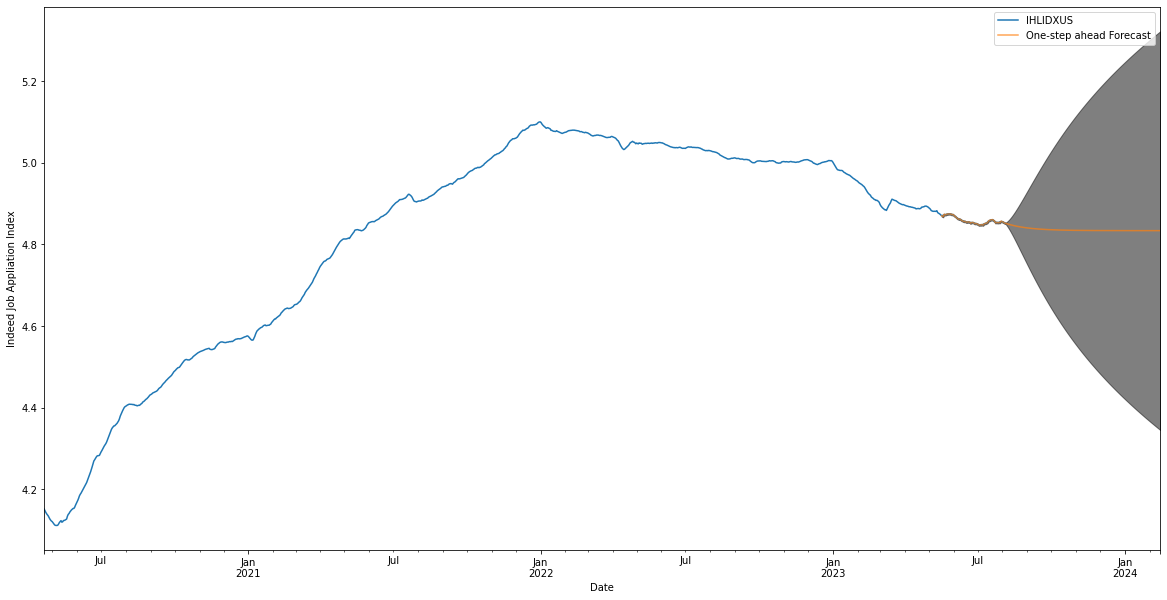

In [104]:
ax = df3['2020-04-21':].plot(label='observed')
pred2.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(20, 10))

ax.fill_between(pred_ci2.index,pred_ci2.iloc[:, 0],pred_ci2.iloc[:, 1], color='k', alpha=.5)
ax.set_xlabel('Date')
ax.set_ylabel('Indeed Job Appliation Index')
plt.legend()
plt.show()

In [105]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
arma_rmse = np.sqrt(mean_squared_error(pred_ci2.iloc[:, 0],pred_ci2.iloc[:, 1]))
mae = mean_absolute_error(pred_ci2.iloc[:, 0],pred_ci2.iloc[:, 1])
print('MAE: %f' % mae)
print("RMSE: ",arma_rmse)

MAE: 0.397643
RMSE:  0.529190106544136
